# TriMeshes and the Octopants Landscape



In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import imread
from quagmire import tools as meshtools
%matplotlib inline

## TriMesh



In [2]:
from quagmire import FlatMesh 
from quagmire import TopoMesh # all routines we need are within this class
from quagmire import SurfaceProcessMesh

minX, maxX = -5.0, 5.0
minY, maxY = -5.0, 5.0,

spacingX = 0.05
spacingY = 0.05

x, y, simplices = meshtools.elliptical_mesh(minX, maxX, minY, maxY, spacingX, spacingY, 1.)

DM = meshtools.create_DMPlex(x, y, simplices)
DM = meshtools.refine_DM(DM, refinement_levels=2)

mesh = SurfaceProcessMesh(DM)

print( "\nNumber of points in the triangulation: {}".format(mesh.npoints))

0 - Delaunay triangulation 0.8943289999999999s
0 - Calculate node weights and area 0.028621999999999925s
0 - Find boundaries 0.0004409999999999137s
0 - cKDTree 0.028802999999999912s
0 - Construct neighbour cloud array 0.8932820000000001s
0 - Construct rbf weights 0.19508800000000015s

Number of points in the triangulation: 156925


In [3]:
x = mesh.coords[:,0]
y = mesh.coords[:,1]
bmask = mesh.bmask

radius  = np.sqrt((x**2 + y**2))
theta   = np.arctan2(y,x)

height  = np.exp(-0.025*(x**2 + y**2)**2) + 0.25 * (0.2*radius)**4  * np.cos(10.0*theta)**2 ## Less so
height  += 0.5 * (1.0-0.2*radius)

rainfall = np.ones_like(height)
rainfall[np.where( radius > 5.0)] = 0.0 

mesh.downhill_neighbours = 2
mesh.update_height(height)


0 - Compute slopes 1.067202s
0 - Build downhill matrices 0.5034320000000001s


In [4]:
mo1 = mesh.identify_outflow_points()
i = np.argsort(theta[mo1])
outflows = mo1[i]

In [5]:
mesh.downhill_neighbours = 2
mesh.update_height(height)

flowpaths = mesh.cumulative_flow(rainfall*mesh.area)
logpaths = np.log10(flowpaths)
sqrtpaths = np.sqrt(flowpaths)

mesh.downhill_neighbours = 3
mesh.update_height(height)


flowpaths3 = mesh.cumulative_flow(rainfall*mesh.area)
logpaths3 = np.log10(flowpaths3)
sqrtpaths3 = np.sqrt(flowpaths3)

mesh.downhill_neighbours = 1
mesh.update_height(height)

flowpaths1 = mesh.cumulative_flow(rainfall*mesh.area)
logpaths1 = np.log10(flowpaths1)
sqrtpaths1 = np.sqrt(flowpaths1)


0 - Compute slopes 1.210903s
0 - Build downhill matrices 0.4998959999999997s


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log10
  """


0 - Compute slopes 1.098263000000001s
0 - Build downhill matrices 0.5589689999999994s


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log10
  del sys.path[0]


0 - Compute slopes 1.1025849999999995s
0 - Build downhill matrices 0.3300540000000005s


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in log10


In [6]:
## What's happening with the outflow points - how to find them ? 
"""
circum_points = np.where( np.abs(radius-4.9) <= 0.001 )[0]
circum_angle = theta[circum_points]

circum_flow_1 = flowpaths1[circum_points]
circum_flow_2 = flowpaths[circum_points]
circum_flow_3 = flowpaths3[circum_points]

circum_flow_1n = flowpaths_noise1[circum_points]
circum_flow_2n = flowpaths_noise[circum_points]
circum_flow_3n = flowpaths_noise3[circum_points]
"""
pass

In [7]:
# Choose a scale to plot all six flow results
fmax = 1.0

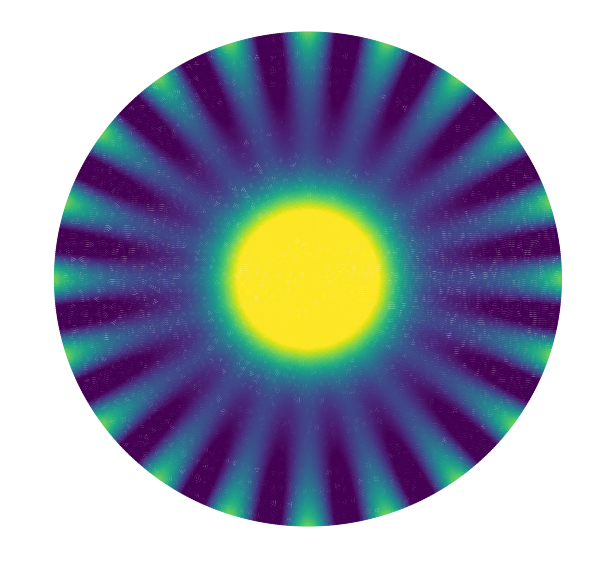

In [9]:
from scipy import ndimage

fig = plt.figure(1, figsize=(10.0, 10.0))
ax = fig.add_subplot(111)
ax.axis('off')
sc = ax.scatter(x[bmask], y[bmask], s=1, c=mesh.heightVariable.data[bmask], vmin=0.0, vmax=1.0)
sc = ax.scatter(x[~bmask], y[~bmask], s=5, c=mesh.heightVariable.data[~bmask], vmin=0.0, vmax=1.0)

# fig.colorbar(sc, ax=ax, label='height')
plt.show()

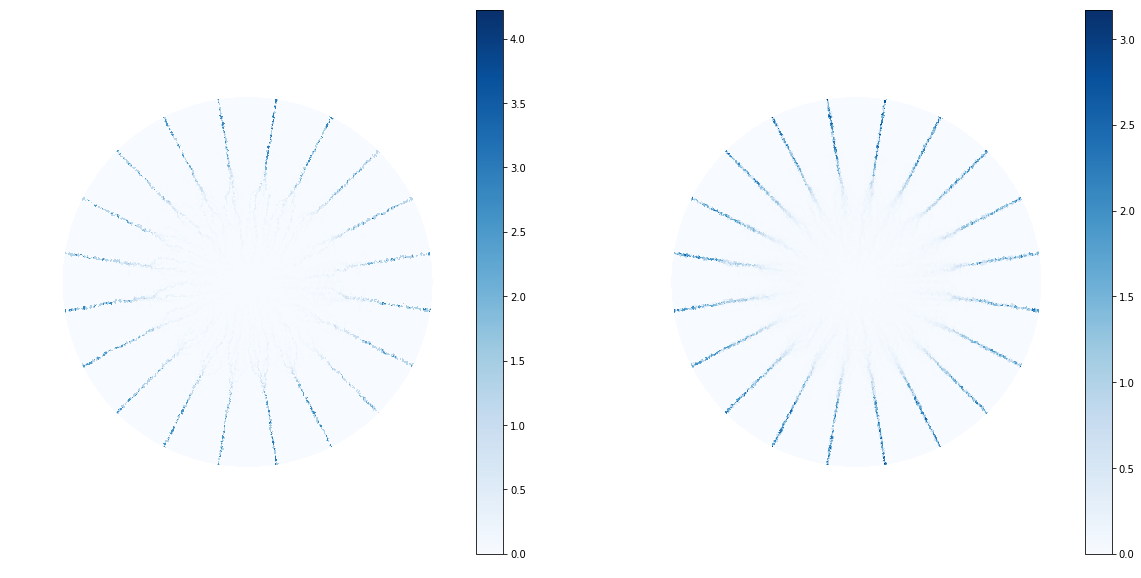

In [10]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,10))
for ax in [ax1, ax2]:
    ax.axis('equal')
    ax.axis('off')
    
    
im1 = ax1.tripcolor(x, y, mesh.tri.simplices, flowpaths1 ,     cmap='Blues')
im2 = ax2.tripcolor(x, y, mesh.tri.simplices, flowpaths,       cmap="Blues")

fig.colorbar(im1, ax=ax1)
fig.colorbar(im2, ax=ax2)
plt.show()